# Exercise Description
## Linear regression with one variable

- In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.
- The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [1]:
import numpy as np
import pandas as pd
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

## 1. Extract Data from Github

In [ ]:
# Load data from github
# Remember to copy the link in the raw mode
url = 'https://raw.githubusercontent.com/SiyuYang-1919/Coursera-ML-AndrewNg-Notes/master/code/ex1-linear%20regression/ex1data1.txt'
data = pd.read_csv(url, delimiter=',', header=None)

Reference: https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
pp = data.rename(columns={0:'Population(10k)', 1:'Profit($ 10k)'})

## 2. Plotting the Data

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=pp['Population(10k)'], y=pp['Profit($ 10k)'], c='cyan', marker='+')
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Population and Profit')

## 3. Gradient Descent

### 3.1 Preparation for the Data

In [ ]:
# Add a column of ones to the dataset
pp.insert(0, 'Ones', 1)

In [ ]:
# Initialize fitting parameters
theta = np.array([[0,0]])
iterations = 1500
alpha = 0.01

In [ ]:
theta.shape

### 3.2 Compute the cost function

In [16]:
# Define a cost function for the linear regrssion with one variable
def CostFunction(m, theta, X, y):
    j = sum((X.dot(np.transpose(theta)) - y)**2) / (2*m)
    return j

In [ ]:
X = np.array(pp.drop(['Profit($ 10k)'], axis=1))
y = np.array(pd.DataFrame(pp['Profit($ 10k)']))
m = pp.shape[0]

In [ ]:
CostFunction(m=m, theta=theta, X=X, y=y)

### 3.3 Gradient descent

In [ ]:
# Write the gradient descent function
def GradientDescent(m, theta, X, y, alpha=0.01, iterations=1500):
    # Update theta_j
    for i in range(iterations):
        differences = X.dot(theta.T) - y
        x_1 = np.array(pd.DataFrame(X[:,1]))
        theta_0 = theta[0][0] - alpha * sum(differences) / m
        theta_1 = theta[0][1] - alpha * sum(differences.T.dot(x_1)) / m
        theta = np.array([[theta_0[0], theta_1[0]]])
        # Call the cost function to check if it is decreasing
        # cost = CostFunction(m, theta, X, y)
        # print(cost)
    return theta

In [ ]:
# Get the parameters
theta_new = GradientDescent(m=m, theta=theta, X=X, y=y, alpha=0.01, iterations=1500)

In [ ]:
# Get the prediction results
predict1 = (np.array([[1, 3.5]])).dot(theta_new.T)
predict2 = (np.array([[1, 7]])).dot(theta_new.T)

In [ ]:
print(predict1, predict2)

In [ ]:
# Plot the linear fit with computed parameters
fig, ax = plt.subplots()
ax.scatter(x=pp['Population(10k)'], y=pp['Profit($ 10k)'], c='cyan', marker='+', label='Training data')
x = pp['Population(10k)']
y_1 = theta_new[0][0] + theta_new[0][1] * x
ax.plot(pp['Population(10k)'], y_1, 'r-', label='Linear regression')
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Population and Profit')
ax.legend(loc='lower right')
plt.show()

## 4. Visualizing

### 4.1 Visualizing the cost function 

In [ ]:
# Prepare the data for plotting
# The following code is modified according to the Octave code and figures provided in the exercise description
size = 100
m = pp.shape[0]
X = np.array(pp.drop(['Profit($ 10k)'], axis=1))
y = np.array(pd.DataFrame(pp['Profit($ 10k)']))

theta0 = np.linspace(-10,10, size)
theta1 = np.linspace(-2, 4, size)
J = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        col = np.array([[theta0[i], theta1[j]]])
        J[i,j] = CostFunction(m, col, X, y)

theta0_g, theta1_g = np.meshgrid(theta0, theta1)
J = J.T

In [ ]:
# Make the 3D surface plot
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')

ax.plot_surface(theta0_g, theta1_g, J, rstride=2, cstride=2, alpha=0.3,
                cmap=cm.rainbow, linewidth=0, antialiased=False)

# Add labels
ax.set_xlabel('thet0')
ax.set_ylabel('theta1')
ax.set_zlabel('J')

# Adjust the format of z-axis
ax.set_zlim(np.min(J), np.max(J))
ax.zaxis.set_major_locator(LinearLocator(10))

# Ajust the format of values in each axis
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.01f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.01f'))

# Add a colorbar
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
plt.savefig('Cost Function 3D', format='png', dpi=300)


In [ ]:
# Make the contour plot
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('theta_0')
ax1.set_ylabel('theta_1')
CS = ax1.contour(theta0_g, theta1_g, J, np.logspace(0, 3, 20))
ax1.clabel(CS, inline=1, fontsize=5)
ax1.scatter(x=theta_new[0][0], y=theta_new[0][1], c='red', marker='+')
plt.savefig('Cost Function Contour', format='png', dpi=300)

### 4.2 Visualizing the gradient process

In [ ]:
# Combine the cost function and gradient descent to get all the data in the minimization process
def combined(m, theta, X, y, alpha=0.01, iterations=1500):
    # Create empty lists to store the data
    theta_0_s = []
    theta_1_s = []
    costs = []
    for i in range(iterations):
        # Fill the initialized/updated values
        theta_0_s.append(theta[0][0])
        theta_1_s.append(theta[0][1])
        costs.append(CostFunction(m, theta, X, y)[0])
        # Update theta_j
        differences = X.dot(theta.T) - y
        x_1 = np.array(pd.DataFrame(X[:,1]))
        theta_0 = theta[0][0] - alpha * sum(differences) / m
        theta_1 = theta[0][1] - alpha * sum(differences.T.dot(x_1)) / m
        theta = np.array([[theta_0[0], theta_1[0]]])
    # Fill the data in a single dataframe
    d = {'theta_0': theta_0_s, 'theta_1': theta_1_s, 'cost': costs}
    cost_data = pd.DataFrame(data=d)
    return cost_data

In [ ]:
costs = combined(m=m, theta=theta, X=X, y=y, alpha=0.01, iterations=1500)

In [ ]:
costs.head()

In [ ]:
# Prepare the data for plotting
# The following code will cost about 5min to run as there are 1500 iterations to finish
length = costs.shape[0]
cost = np.zeros((length, length))

for i in range(length):
    for j in range(length):
        theta = np.array([[costs['theta_0'][i], costs['theta_1'][j]]])
        cost[i,j] = CostFunction(m, theta, X, y)

theta_0 = np.array(costs['theta_0'])
theta_1 = np.array(costs['theta_1'])
theta_0_g, theta_1_g = np.meshgrid(theta_0, theta_1)
cost = cost.T

In [ ]:
# Make the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')

ax.plot_surface(theta_0_g, theta_1_g, cost, rstride=2, cstride=2, alpha=0.3,
                cmap=cm.rainbow, linewidth=0, antialiased=False)

ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('cost')

ax.set_zlim(np.min(cost), np.max(cost))
ax.zaxis.set_major_locator(LinearLocator(10))

ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.01f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.01f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('Gradient Descent 3D', format='png', dpi=300)

In [ ]:
# Make the contour plot with the path of optimization
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.set_xlabel('theta_0')
ax2.set_ylabel('theta_1')
CS = ax2.contour(theta_0_g, theta_1_g, cost, np.logspace(0, 2, 20))
ax2.clabel(CS, inline=1, fontsize=10)
ax2.scatter(x=theta_new[0][0], y=theta_new[0][1], c='red', marker='+')
ax2.scatter(x=costs['theta_0'], y=costs['theta_1'], s=0.1, c='dodgerblue', marker='.')
plt.savefig('Gradient Descent Contour', format='png', dpi=300)

In [ ]:
# Convergence of gradient descent
# Exclude the first value of theta_0, theta_1, and cost
x = np.arange(1, iterations)
y = costs['cost'][1:]
fig3, ax3 = plt.subplots(figsize=(10, 6))
ax3.plot(x, y, 'r-')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Costs')
plt.savefig('Convergence of Gradient Descent', format='png', dpi=300)

## Linear Regression with Multiple Variables

- In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing
prices. 
- The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house.

## 1. Extract Data from Github

In [2]:
url1 = 'https://raw.githubusercontent.com/SiyuYang-1919/Coursera-ML-AndrewNg-Notes/master/code/ex1-linear%20regression/ex1data2.txt'
data1 = pd.read_csv(url1, delimiter=',', header=None)

In [3]:
lrmv = data1.rename(columns={0: 'House size(square feet)', 1: 'Bedroom number', 2: 'House Price'})

## 2. Plotting the Data

Text(0, 0.5, 'House Price')

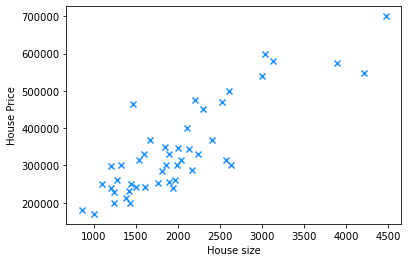

In [4]:
# House size
fig, ax = plt.subplots()
ax.scatter(x=lrmv['House size(square feet)'], y=lrmv['House Price'], c='dodgerblue', marker='x')
ax.set_xlabel('House size')
ax.set_ylabel('House Price')

In [5]:
# Bedroom number
lrmv['Bedroom number'].value_counts()

3    25
4    14
2     6
5     1
1     1
Name: Bedroom number, dtype: int64

Text(0.5, 1.0, 'Bedroom number')

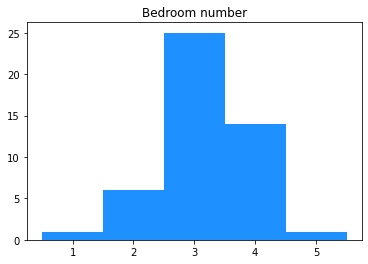

In [6]:
fig, ax = plt.subplots()
ax.hist(lrmv['Bedroom number'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], color='dodgerblue')
ax.set_title('Bedroom number')

Text(0, 0.5, 'House Price')

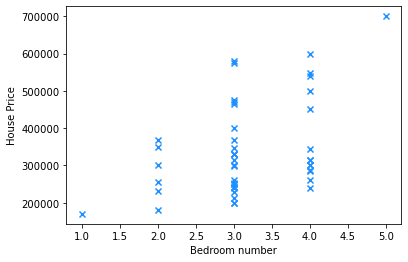

In [7]:
fig, ax = plt.subplots()
ax.scatter(x=lrmv['Bedroom number'], y=lrmv['House Price'], c='dodgerblue', marker='x')
ax.set_xlabel('Bedroom number')
ax.set_ylabel('House Price')

## 3. Feature Normalization

In [8]:
def FeatureNormalization(values):
    mean = np.mean(values)
    std = np.std(values)
    values_fn = (values - mean) / std
    return round(mean,2), round(std,2), np.round(values_fn,2)

In [9]:
mean_hs, std_hs, lrmv['House size(square feet)']= FeatureNormalization(lrmv['House size(square feet)'])

In [10]:
mean_bn, std_bn, lrmv['Bedroom number']= FeatureNormalization(lrmv['Bedroom number'])

In [11]:
lrmv.insert(0, 'Ones', 1)

In [12]:
lrmv.head()

,Ones,House size(square feet),Bedroom number,House Price
0,1,0.13,-0.23,399900
1,1,-0.51,-0.23,329900
2,1,0.51,-0.23,369000
3,1,-0.74,-1.55,232000
4,1,1.27,1.10,539900


## 4. Modified Cost Function and Gradient Descent

In [17]:
m1 = lrmv.shape[0]
theta1 = np.array([[0, 0, 0]])
X1 = np.array(lrmv.drop(['House Price'], axis=1))
y1 = np.array(pd.DataFrame(lrmv['House Price']))
CostFunction(m=m1, theta=theta1, X=X1, y=y1)

array([6.55915481e+10])